<a href="https://colab.research.google.com/github/signofcommunication/Tugas-Matana-University/blob/master/Face_Expression_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install deepface
import cv2
import numpy as np
import matplotlib.pyplot as plt
from deepface import DeepFace

Saving REL08131.JPG to REL08131 (1).JPG
Loaded: REL08131 (1).JPG


(np.float64(-0.5), np.float64(2399.5), np.float64(4239.5), np.float64(-0.5))

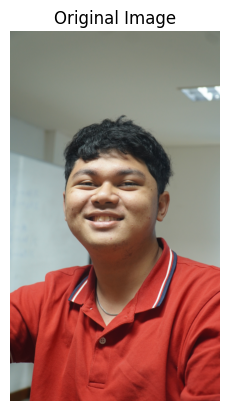

In [11]:
from google.colab import files
uploaded = files.upload()

import cv2
import numpy as np
import matplotlib.pyplot as plt

for fn in uploaded.keys():
    img_path = fn
    print("Loaded:", img_path)

img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")


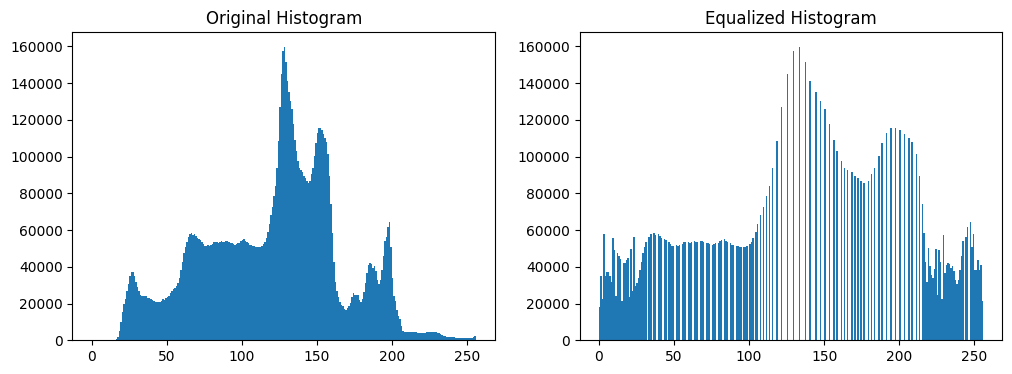

(np.float64(-0.5), np.float64(2399.5), np.float64(4239.5), np.float64(-0.5))

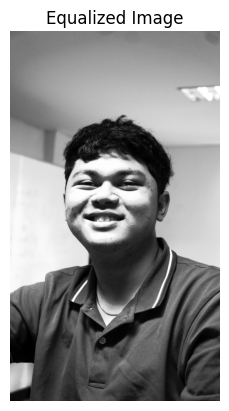

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Histogram original
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(gray.ravel(), 256, [0,256])
plt.title("Original Histogram")

# Equalization
equalized = cv2.equalizeHist(gray)

plt.subplot(1,2,2)
plt.hist(equalized.ravel(), 256, [0,256])
plt.title("Equalized Histogram")
plt.show()

plt.imshow(equalized, cmap="gray")
plt.title("Equalized Image")
plt.axis("off")


(np.float64(-0.5), np.float64(2399.5), np.float64(4239.5), np.float64(-0.5))

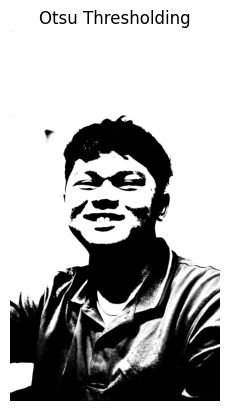

In [13]:
_, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(otsu, cmap="gray")
plt.title("Otsu Thresholding")
plt.axis("off")


(np.float64(-0.5), np.float64(2399.5), np.float64(4239.5), np.float64(-0.5))

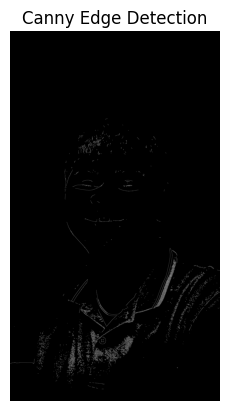

In [14]:
edges = cv2.Canny(gray, 100, 200)

plt.imshow(edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.axis("off")


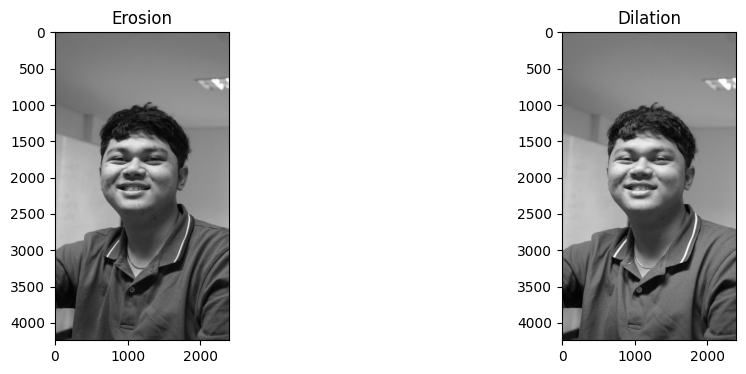

In [15]:
kernel = np.ones((5,5), np.uint8)

eroded = cv2.erode(gray, kernel, iterations=1)
dilated = cv2.dilate(gray, kernel, iterations=1)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.imshow(eroded, cmap="gray")
plt.title("Erosion")

plt.subplot(1,2,2)
plt.imshow(dilated, cmap="gray")
plt.title("Dilation")

plt.show()


--2025-12-12 06:28:38--  https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml [following]
--2025-12-12 06:28:39--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  5.65MB/s    in 0.2s    

20

(np.float64(-0.5), np.float64(2399.5), np.float64(4239.5), np.float64(-0.5))

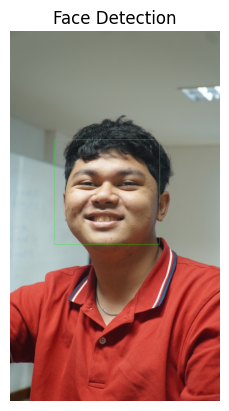

In [16]:
!wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml

face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

img_detect = img_rgb.copy()

for (x,y,w,h) in faces:
    cv2.rectangle(img_detect, (x,y), (x+w, y+h), (0,255,0), 2)

plt.imshow(img_detect)
plt.title("Face Detection")
plt.axis("off")


Dominant Emotion: happy


(np.float64(-0.5), np.float64(2399.5), np.float64(4239.5), np.float64(-0.5))

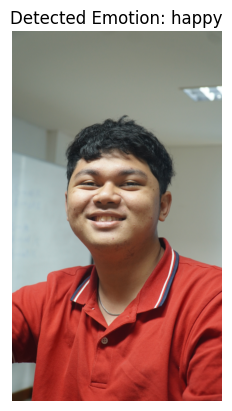

In [17]:
result = DeepFace.analyze(img_rgb, actions=['emotion'], enforce_detection=False)

print("Dominant Emotion:", result[0]['dominant_emotion'])

plt.imshow(img_rgb)
plt.title("Detected Emotion: " + result[0]['dominant_emotion'])
plt.axis("off")
